In [1]:
#关于文档的一个数据分类
import pandas as pd
import seaborn as sns  #用于绘制热图的工具包
from scipy.cluster import hierarchy  #用于进行层次聚类，话层次聚类图的工具包
from scipy import cluster   
import matplotlib.pyplot as plt
from sklearn import decomposition as skldec #用于主成分分析降维的包
import numpy as np
#import csv
import math
from pandas import Series,DataFrame
from matplotlib.ticker import  MultipleLocator
import pylab as pl   #画图用
from sklearn import svm
from sklearn import linear_model

In [2]:
data=pd.read_excel('E:/vcdata/vcdata(91-17-new).xlsx')
data1=data.replace(0,np.nan)
def getstr(s):
    return str(s)[:4]
data1['get_year'] = data1['投资时间'].map(getstr)

dyj=data1.groupby(["一级名称", "get_year"], as_index=False)['投资金额(RMB)'].count()
dyj2=data1.groupby(["一级名称"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
dEj2=data1.groupby(["二级名称"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
dSj2=data1.groupby(["三级产业名称"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数

In [3]:
dyj2=dyj2[1:]
yjsort=dyj2.sort_values(by="投资金额(RMB)" , ascending=False)###根据投资次数进行排序

dEj2=dEj2[1:]
ejsort=dEj2.sort_values(by="投资金额(RMB)" , ascending=False)###根据投资次数进行排序

dSj2=dSj2[0:2].append(dSj2[3:])
sjsort=dSj2.sort_values(by="投资金额(RMB)" , ascending=False)###根据投资次数进行排序

In [4]:
Xdyj=data1.groupby(["一级字母代码", "get_year"], as_index=False)['投资金额(RMB)'].count()
Xdyj2=data1.groupby(["一级字母代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
XdEj2=data1.groupby(["二级代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
XdSj2=data1.groupby(["三级代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数

In [5]:
Xdyj2=Xdyj2[1:]
XdEj2=XdEj2[0:1].append(XdEj2[2:])
XdSj2=XdSj2[1:]

In [6]:
yjName=yjsort['一级名称'].drop_duplicates().values###得到一级产业名称
c=len(yjName)###一级产业数量
a=list(sns.color_palette("hls", c))
yj_color=dict(zip(yjName,a))

In [7]:
###按照排序后的投资数目进行画图，查看一级、二级、三级产业投资情况
def ind_num(data,name1,name2,name3,yj_color,juli,num):  
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
    plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）
    font2 = {'family' : 'Arial','weight' : 'normal','size' : 24,}###设置横纵坐标的字体格式
    font1 = {'family' : 'Arial','weight' : 'normal','size' : 20,}###设置横纵坐标的字体格式
    plt.xlabel(name3+' industry rank',font2)
    plt.ylabel('Number of investments',font2)
    plt.tick_params(labelsize=23) #刻度字体大小13
    pFname=data[name1].drop_duplicates().values###产业名称
    YJname=data['一级名称'].values###一级产业名称
    pFirst=data[name2].values###金额
    x=np.arange(1,len(pFname)+1)
    xmajorLocator = MultipleLocator(juli)
    xminorLocator = MultipleLocator(1.0)
    ax1.xaxis.set_major_locator(xmajorLocator)
    ax1.xaxis.set_minor_locator(xminorLocator)
    sj20 = []###排名前20的三级产业名称
    for i in range(len(pFname)):
        plt.bar(x[i],pFirst[i],color=yj_color[YJname[i]])###根据一级产业名称进行描色
        if i<num:
            plt.bar(x[i],pFirst[i],color=yj_color[YJname[i]],label=pFname[i])###根据一级产业名称进行描色
#         if i<num:
#             sj20.append(sjcn[str(pFname[i])])
    plt.legend(loc='upper right',fontsize=11)
    
    
    
#     plt.savefig('E:/vcdata/pic/picSC/Fig1_buchong(三级产业）.pdf', bbox_inches='tight')
#     plt.show()

In [8]:
# # cityUN=list(set(city2).intersection(set(city))) ###得到两个城市的交集
# def d(s):###二三级产业和一级产业对应
#     end=Thirdary_Industry[s]
#     return(end)

# sjCE = {'互联网信息服务 ':'Internet Information Service','互联网平台':'Internet platform','软件开发 ':'Software development','货摊、无店铺及其他零售业':'Retail trade not in stores, stalls or markets',
#        '计算机制造':'Computer manufacturing','其他电气机械及器材制造':'Manufacture of other electrical equipment','医院 ':'Hospital',
#        '生物药品制品制造':'Biopharmaceutical products manufacturing','电子器件制造':'Other electronic device manufacturing','其他互联网服务':'Other internet services',
#        '影视节目制作 ':'Film and television production','节能环保工程施工':'Energy saving and environmental protection engineering construction',
#        '房地产开发经营 ':'Real estate development and management','技术推广服务 ':'Technical extension services',' 医疗仪器设备及器械制造':'Medical equipment and apparatus manufacturing',
#        '技能培训、教育辅助及其他教育':'Skills training, education assistance and other education','数字内容服务 ':'Digital Content Service',
#        '非电力家用器具制造':'Non-electric household appliance manufacturing','煤炭加工 ':'Coal processing','广告业 ':'Advertising','其他电子设备制造':'Other electronic equipment manufacturing'}
# Thirdary_Industry=data.set_index('三级产业名称').to_dict()['一级名称']###将二级产业和一级产业对应，根据一级产业描色
# sjsort['一级名称']=sjsort['三级产业名称'].map(d)
# ind_num(sjsort,'三级产业名称','投资金额(RMB)','Third-level',yj_color,10,sjCE)

In [9]:
Xdyj=data1.groupby(["一级字母代码", "get_year"], as_index=False)['投资金额(RMB)'].count()
Xdyj2=data1.groupby(["一级字母代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
XdEj2=data1.groupby(["二级代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数
XdSj2=data1.groupby(["三级代码"], as_index=False)['投资金额(RMB)'].count()###得到每一个一级产业的投资数

In [10]:
Xdyj2=Xdyj2[1:]
XdEj2=XdEj2[0:1].append(XdEj2[2:])
XdSj2=XdSj2[1:]

In [11]:
yjName=yjsort['一级名称'].drop_duplicates().values###得到一级产业名称
c=len(yjName)###一级产业数量
a=list(sns.color_palette("hls", c))
yj_color=dict(zip(yjName,a))

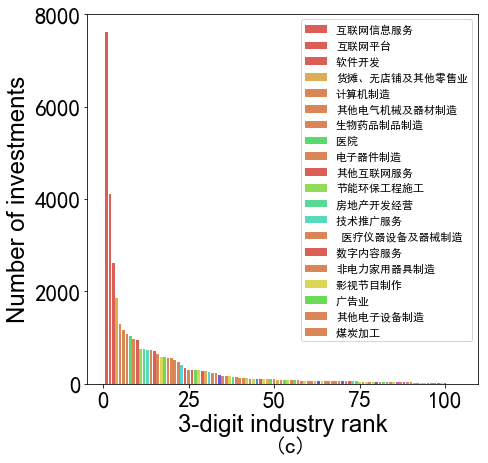

In [35]:
def d2(s):###二三级产业和一级产业对应
    end=Secondary_Industry[s]
    return(end)
Secondary_Industry=data.set_index('二级名称').to_dict()['一级名称']###将二级产业和一级产业对应，根据一级产业描色
ejsort['一级名称']=ejsort['二级名称'].map(d2)
def d(s):###二三级产业和一级产业对应
    end=Thirdary_Industry[s]
    return(end)
Thirdary_Industry=data.set_index('三级产业名称').to_dict()['一级名称']###将二级产业和一级产业对应，根据一级产业描色
sjsort['一级名称']=sjsort['三级产业名称'].map(d)
fig = plt.figure(figsize=(7,6.8))
# ax1=fig.add_subplot(111)
# plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
# plt.rcParams['font.sans-serif'] = ['KaiTi']   # 指定默认字体
# ind_num(yjsort,'一级名称','投资金额(RMB)','1-letter',yj_color,5,20.5)
# # plt.text(-2,18000,'(a)',fontsize=22)
# plt.text(10,-3700,'(a)',fontsize=26)

# ax2=fig.add_subplot(111)
# ind_num(ejsort,'二级名称','投资金额(RMB)','2-digit',yj_color,10,20)
# plt.text(30,-2600,'(b)',fontsize=26)

ax3=fig.add_subplot(111)
ind_num(sjsort,'三级产业名称','投资金额(RMB)','3-digit',yj_color,10,20)
# plt.savefig('E:/vcdata/pic/picSC/sup_Fig2_buchong(3级产业）.pdf', bbox_inches='tight')
plt.text(50,-1500,'(c)',fontsize=22)
plt.savefig('E:/0论文/2picture/2_5c.png',dpi=500, bbox_inches='tight')

In [52]:
data['一级名称'].drop_duplicates().values

array(['制造业', '金融业', '批发和零售业', '房地产业', '信息传输、软件和信息技术服务业', '建筑业',
       '租赁和商务服务业 ', '电力、热力、燃气及水生产和供应业 ', '交通运输、仓储和邮政业 ', '科学研究和技术服务业',
       '--', '文化、体育和娱乐业', '住宿和餐饮业', '农、林、牧、渔业', '采矿业', '卫生和社会工作', '教育',
       '农/林/牧/渔业', '居民服务、修理和其他服务业', '文化/体育和娱乐业', '农/林/牧/渔服务业'],
      dtype=object)